#선형 회귀 
최소제곱법 (유클리드 거리 가시화)

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_study/bmi.csv")
df = df[:50]
df.head()

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat


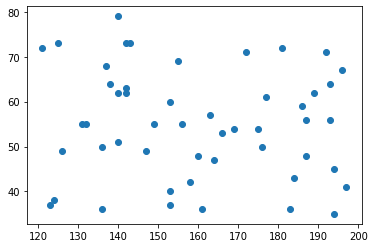

In [ ]:
X = df["height"]
y = df["weight"]
plt.plot(X, y, 'o')
plt.show()

In [ ]:
#sklearn 사용
from sklearn.linear_model import LinearRegression
#모델 생성
line_fitter = LinearRegression()
#X는 2차원 array (다중회귀분석 위해)
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [ ]:
#키가 170인 사람 예측
height = line_fitter.predict([[70]])
print("height = ", height)


height =  [59.35006643]


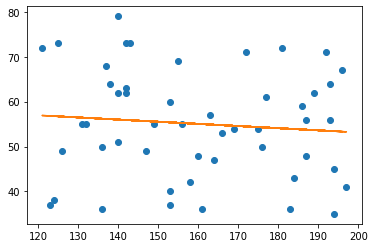

In [ ]:
#기존 x 값으로 y 값 예측
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

#로지스틱 회귀

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/drive/MyDrive/ML_study/admissions.csv', engine='python', encoding='CP949')
data.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [ ]:
x = data[['gre', 'gpa']]  #변수 지정
y = data[['admit']]


In [ ]:
#모델의 회귀계수와 오즈비를 구해 독립변수(gre/ gpa)가 분류 결정에 미치는 영향의 정도 알아보기
import statsmodels.api as sm
logit = sm.Logit(y,x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.629250
         Iterations 5


In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: -0.007  
Dependent Variable: admit            AIC:              503.6246
Date:               2022-01-02 19:23 BIC:              511.5924
No. Observations:   397              Log-Likelihood:   -249.81 
Df Model:           1                LL-Null:          -248.08 
Df Residuals:       395              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
gre      0.0015     0.0010    1.5632   0.1180   -0.0004    0.0035
gpa     -0.4794     0.1753   -2.7342   0.0063   -0.8231   -0.1358
===============================================================

"""

In [ ]:
np.exp(result.params)

gre    1.001546
gpa    0.619132
dtype: float64



*   오즈가 1에서 멀리 떨어질 수록 종속 변수와의 관계가 
강하다. (종속 변수 여부에 큰 영향을 준다.)
*   gre는 1에 극도로 가까워 영향이 크지 않다.
*   gpa는 1과 떨어져 있으므로 합격여부에 영향을 미친다.
> 학점이 1단위 증가하면 합격할 확률이 0.61배 증가한다.



